In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



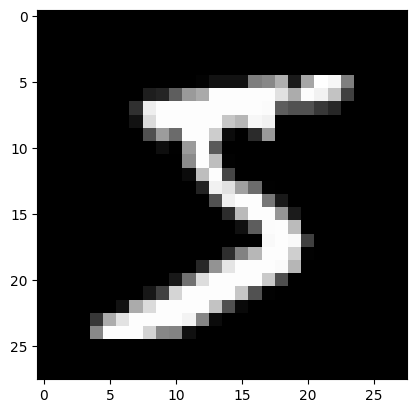

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.show()


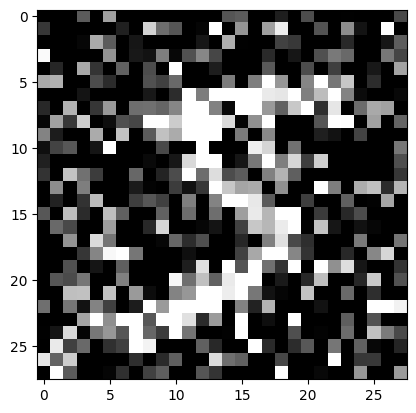

In [3]:
def add_noise(imgs, noise_factor=0.5):
    noisy_imgs = imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs.shape)
    noisy_imgs = np.clip(noisy_imgs, 0., 1.)
    return noisy_imgs

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

plt.imshow(x_train_noisy[0].reshape(28, 28), cmap='gray')
plt.show()


In [4]:
def build_autoencoder():
    input_img = layers.Input(shape=(28, 28, 1))  
    
    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    # Autoencoder model
    autoencoder = models.Model(input_img, decoded)
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [5]:
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128, validation_data=(x_test_noisy, x_test))


Epoch 1/50
469/469 [==============================] - 16s 20ms/step - loss: 0.1543 - val_loss: 0.1137
Epoch 2/50
469/469 [==============================] - 8s 17ms/step - loss: 0.1108 - val_loss: 0.1057
Epoch 3/50
469/469 [==============================] - 8s 17ms/step - loss: 0.1049 - val_loss: 0.1022
Epoch 4/50
469/469 [==============================] - 8s 17ms/step - loss: 0.1021 - val_loss: 0.1003
Epoch 5/50
469/469 [==============================] - 8s 17ms/step - loss: 0.1002 - val_loss: 0.0991
Epoch 6/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0991 - val_loss: 0.0977
Epoch 7/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0981 - val_loss: 0.0971
Epoch 8/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0974 - val_loss: 0.0962
Epoch 9/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0968 - val_loss: 0.0958
Epoch 10/50
469/469 [==============================] - 8s 17ms/step - loss: 0.0962 - val_l

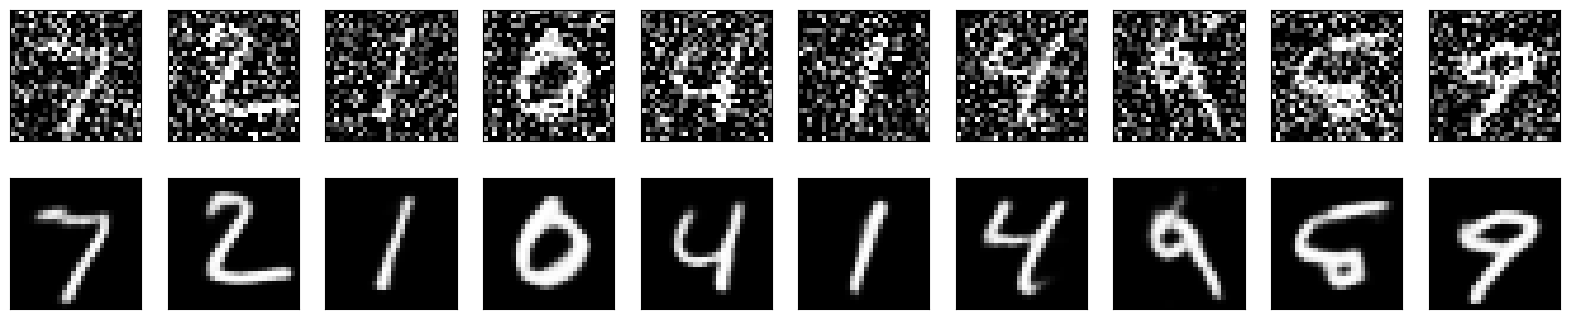

In [6]:
denoised_images = autoencoder.predict(x_test_noisy)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [7]:
# autoencoder.save('autoencoder_denoise_model.h5')


# effects of noise

In [22]:
import numpy as np
import matplotlib.pyplot as plt

blank_img = np.zeros((28, 28))  


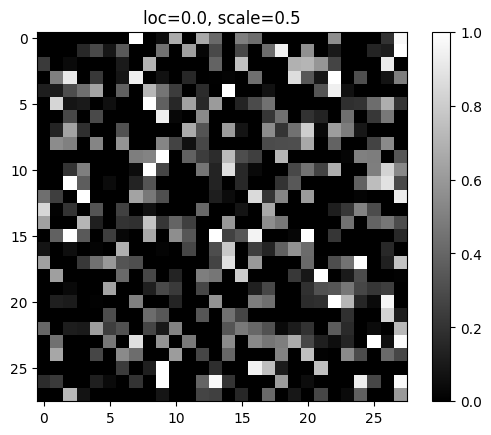

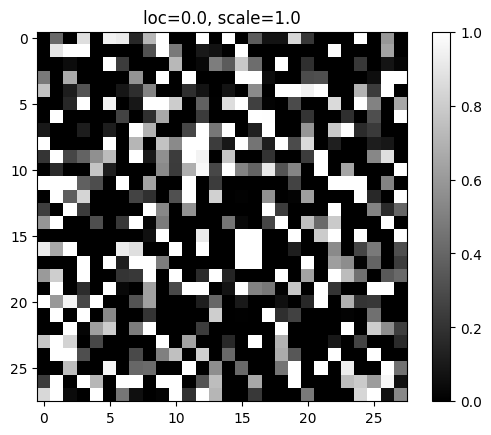

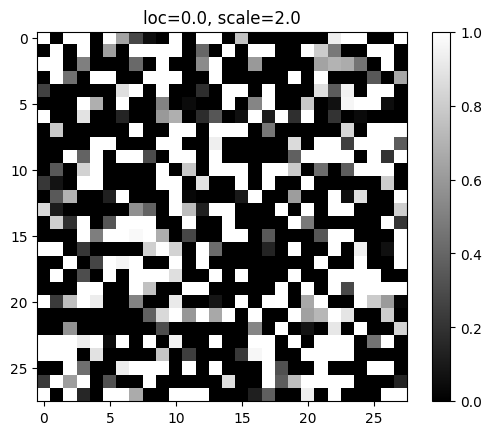

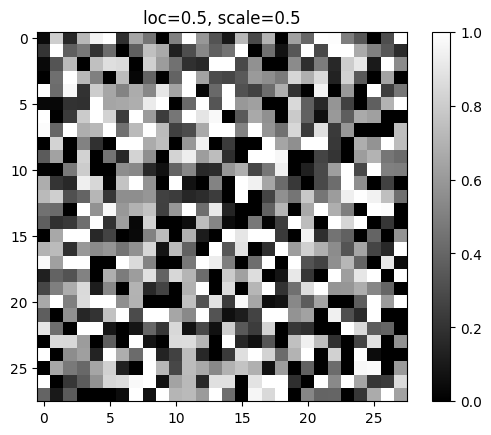

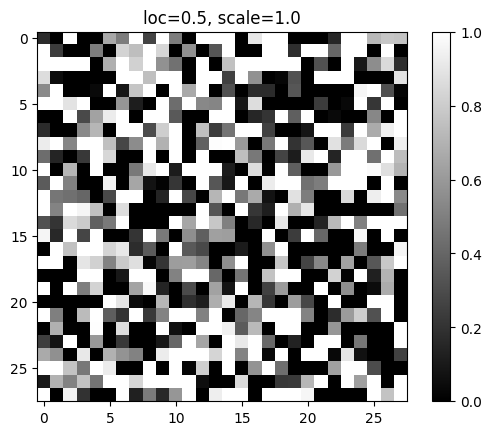

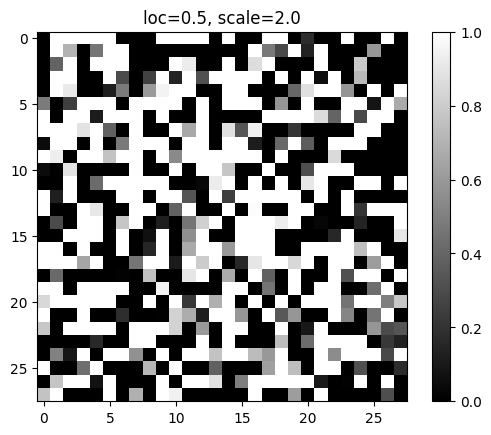

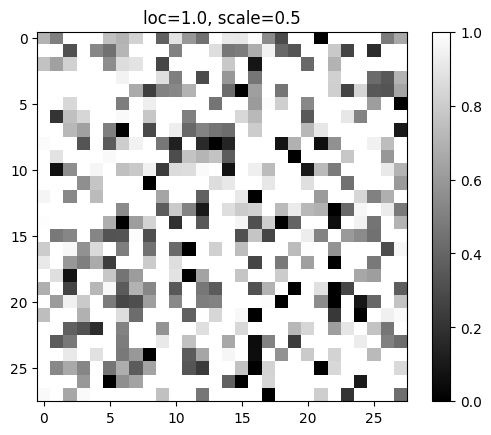

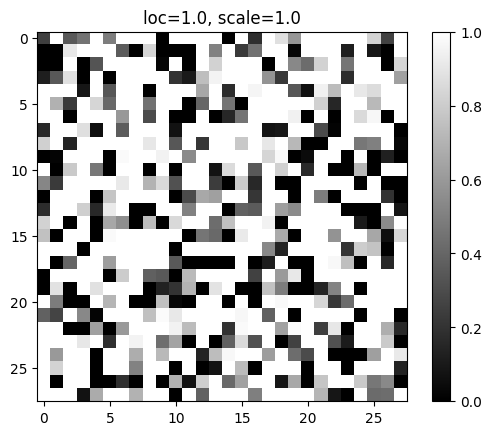

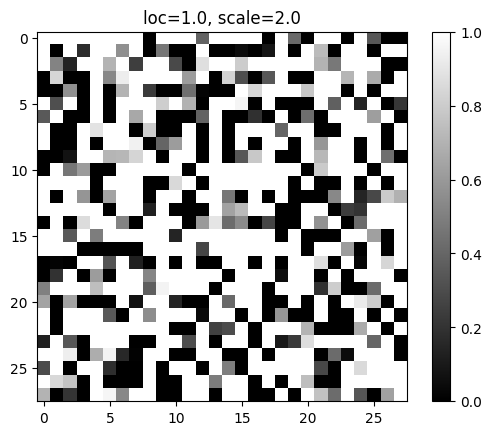

In [23]:
noise_factor = 1.0
loc_values = [0.0, 0.5, 1.0]  
scale_values = [0.5, 1.0, 2.0]  

for loc in loc_values:
    for scale in scale_values:
        noisy_img = blank_img + noise_factor * np.random.normal(
            loc=loc, scale=scale, size=blank_img.shape
        )
        # Clip the noisy image to [0, 1] range
        noisy_img = np.clip(noisy_img, 0, 1)

        # Display the image
        plt.figure()
        plt.title(f"loc={loc}, scale={scale}")
        plt.imshow(noisy_img, cmap='gray')
        plt.colorbar()
        plt.show()


# Test on real image

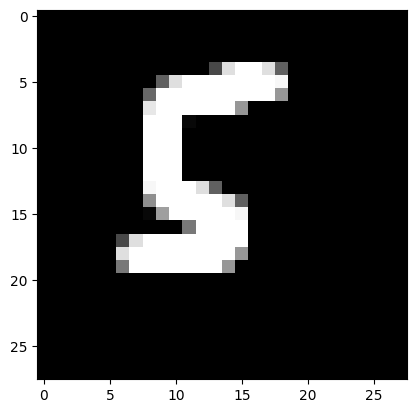

In [9]:
import cv2
from tensorflow.keras.models import load_model

autoencoder= load_model("autoencoder_denoise_model.h5")
img = cv2.imread("img1.png")

grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

grayscale_img = cv2.resize(grayscale_img, (28, 28))

grayscale_array = grayscale_img.astype("float32") / 255.0
img=np.expand_dims(grayscale_array,axis=-1)

plt.imshow(img,cmap="gray")


In [10]:
img=np.expand_dims(img,axis=0)

In [11]:
img2=img+0.5*np.random.normal(loc=0.0,scale=1.0,size=img.shape)
img2=np.clip(img2,0.,1.)


In [12]:
predicted_img=autoencoder.predict(img2)


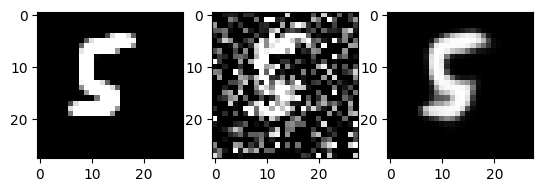

In [13]:
imgs=[img,img2,predicted_img]
for i in range(1,4): 
    plt.subplot(1,3,i)
    plt.imshow(imgs[i-1][0],cmap="gray")
